In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('boston Interpolated summary lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,180.049947,5.93,49396,4459.312,4.7,287293.8040,1204.93445,40.50%,226272.0000,0.50%,1479,0.02,197.4
1,4/1/2005,179.342073,5.86,49726,4460.729,4.4,287317.3738,1217.46160,40.50%,227099.6667,0.47%,1235,0.32,198.6
2,5/1/2005,178.325591,5.72,50056,4462.145,4.3,287340.9436,1229.98875,40.50%,227927.3333,0.43%,1616,0.42,198.6
3,6/1/2005,176.495037,5.58,50386,4463.562,4.8,287364.5134,1242.51590,40.50%,228755.0000,0.40%,1983,0.32,198.8
4,7/1/2005,175.601666,5.70,50717,4464.978,4.6,287388.0832,1255.04305,40.57%,229226.6667,0.43%,1632,1.06,198.8
5,8/1/2005,174.917560,5.82,51047,4466.395,4.3,287411.6530,1267.57020,40.63%,229698.3333,0.47%,1222,0.93,207.2
6,9/1/2005,173.847772,5.77,51377,4467.811,4.7,287435.2228,1280.09735,40.70%,230170.0000,0.50%,1252,1.23,207.2
7,10/1/2005,173.731544,6.07,51707,4469.228,4.2,287458.7926,1292.62450,40.57%,231436.3333,0.53%,1235,1.15,203.2
8,11/1/2005,171.911231,6.33,52038,4470.644,4.4,287482.3624,1305.15165,40.43%,232702.6667,0.57%,1234,0.94,203.2
9,12/1/2005,171.287894,6.27,52368,4472.061,4.2,287505.9322,1317.67880,40.30%,233969.0000,0.60%,1714,0.73,204.9


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,180.049947,5.93,49396,4459.312,4.7,287293.8040,1204.93445,226272.0000,1479,0.02,197.4,40.50,0.50
1,4/1/2005,179.342073,5.86,49726,4460.729,4.4,287317.3738,1217.46160,227099.6667,1235,0.32,198.6,40.50,0.47
2,5/1/2005,178.325591,5.72,50056,4462.145,4.3,287340.9436,1229.98875,227927.3333,1616,0.42,198.6,40.50,0.43
3,6/1/2005,176.495037,5.58,50386,4463.562,4.8,287364.5134,1242.51590,228755.0000,1983,0.32,198.8,40.50,0.40
4,7/1/2005,175.601666,5.70,50717,4464.978,4.6,287388.0832,1255.04305,229226.6667,1632,1.06,198.8,40.57,0.43


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,49396,4459.312,4.7,287293.8040,1204.934450,226272.0000,1479,0.02,197.400,40.50,0.50
1,5.86,49726,4460.729,4.4,287317.3738,1217.461600,227099.6667,1235,0.32,198.600,40.50,0.47
2,5.72,50056,4462.145,4.3,287340.9436,1229.988750,227927.3333,1616,0.42,198.600,40.50,0.43
3,5.58,50386,4463.562,4.8,287364.5134,1242.515900,228755.0000,1983,0.32,198.800,40.50,0.40
4,5.70,50717,4464.978,4.6,287388.0832,1255.043050,229226.6667,1632,1.06,198.800,40.57,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,73671,4828.142,3.4,430405.1208,707.195167,239108.0000,757,2.62,243.682,36.80,1.50
138,3.46,73939,4830.868,3.4,431883.1237,707.245375,239019.0000,1851,2.83,243.682,36.70,1.50
139,3.47,74208,4833.594,3.1,433361.1265,707.295583,239256.3333,915,2.81,243.575,36.63,1.47
140,3.77,74476,4836.320,3.0,434839.1293,707.345792,239493.6667,1036,2.70,243.575,36.57,1.43


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930,1.054379,3.3500,3.925000,4.555000,5.927500,6.7600
Personal_Income,142.0,61084.929577,6535.192045,49396.0000,56029.000000,60525.000000,65269.250000,74744.0000
Resident_Population,142.0,4636.980063,115.290811,4459.3120,4549.286000,4611.740000,4746.013250,4839.0460
Unemployment_Rate,142.0,5.443662,1.345782,3.0000,4.400000,5.250000,6.400000,8.6000
GDP,142.0,348118.108785,44722.691353,287293.8040,309266.076375,341601.921650,380166.714800,436317.1322
Crime_Rate,142.0,965.733423,215.350456,706.7935,778.843344,896.201912,1145.668994,1339.4548
Median_Debt,142.0,240406.556338,4211.060577,226272.0000,238266.416650,239866.166700,243823.833325,246863.0000
New_Structures,142.0,869.429577,415.966096,237.0000,566.250000,802.500000,1090.500000,2127.0000
Economic_Conditions_Index,142.0,1.239507,1.758399,-5.2100,0.805000,1.570000,2.330000,4.0200
CPI all items less shelter,142.0,228.085296,14.095946,197.4000,217.169000,231.990000,240.993000,247.1900


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.788613,-1.541043,-0.552587,-1.360032,1.110752,-3.356531,1.465433,-0.693533,-2.176888,0.323295,-1.644578
1,0.972203,-1.738117,-1.528752,-0.775506,-1.359505,1.168923,-3.159985,0.878847,-0.522923,-2.091757,0.323295,-1.669082
2,0.839424,-1.687621,-1.516470,-0.849812,-1.358978,1.227094,-2.963439,1.794787,-0.466053,-2.091757,0.323295,-1.701755
3,0.706644,-1.637126,-1.504179,-0.478281,-1.358451,1.285265,-2.766894,2.677070,-0.522923,-2.077569,0.323295,-1.726260
4,0.820455,-1.586477,-1.491897,-0.626893,-1.357924,1.343436,-2.654887,1.833251,-0.102086,-2.077569,0.363922,-1.701755
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,1.925891,1.658085,-1.518568,1.839939,-1.200547,-0.308368,-0.270285,0.785085,1.106467,-1.824105,-0.827754
138,-1.304019,1.966900,1.681729,-1.518568,1.872987,-1.200313,-0.329503,2.359737,0.904512,1.106467,-1.882142,-0.827754
139,-1.294534,2.008062,1.705374,-1.741487,1.906035,-1.200080,-0.273143,0.109553,0.893138,1.098877,-1.922769,-0.852258
140,-1.010007,2.049071,1.729018,-1.815793,1.939083,-1.199847,-0.216784,0.400442,0.830581,1.098877,-1.957592,-0.884931


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

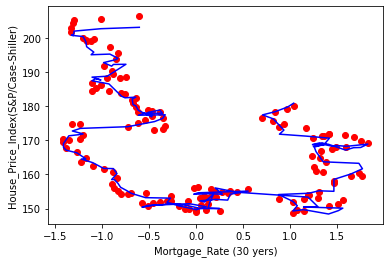

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.51
Accuracy: 99.11 %.


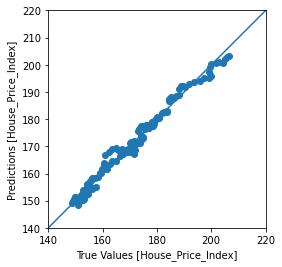

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9850590908095755

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,0.475759
1,-36.028366
2,-8.059487
3,1.553361
4,58.590988
5,5.391941
6,1.829012
7,-0.367577
8,1.318127
9,-2.350859


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[180.91739493 179.77635361 178.40281494 177.4805894  176.32246461
 173.02046447 171.81718126 171.24801718 170.65169203 168.77910622
 168.19646455 169.1615508  168.84220453 167.164446   167.85038466
 167.91890518 168.90219247 168.25434272 168.51651192 168.30647518
 168.93357578 168.74825141 169.26939959 168.92523969 168.04903377
 166.69552248 163.71254839 163.26993076 161.67168779 160.13247666
 158.54900056 155.05980931 155.19878789 154.4879452  154.10407821
 152.10878134 150.8255543  149.28110201 149.68035678 148.39266355
 149.38000292 150.1091406  150.44579463 150.55155634 153.35622963
 154.79189797 156.04508187 154.19609128 154.35066298 154.20019568
 154.62051279 155.11534344 154.20819823 152.47463534 152.68539618
 152.43187655 152.26543314 151.90378866 154.15043955 151.83059534
 150.16009083 149.99396993 149.9837267  150.88092248 151.4515431
 151.05009524 150.91569871 150.37422634 150.92510281 151.33728551
 151.41673341 150.52126025 149.69287423 149.65537875 150.80543461
 151.847741

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,180.917395
1,179.776354
2,178.402815
3,177.480589
4,176.322465
...,...
137,200.931141
138,200.734810
139,202.062047
140,202.770099


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.788613,-1.738117,-1.687621,-1.637126,-1.586477,-1.535981,-1.485485,-1.434989,-1.384340,-1.333844,...,1.720695,1.761856,1.802865,1.843874,1.884883,1.925891,1.966900,2.008062,2.049071,2.090079
Resident_Population,-1.541043,-1.528752,-1.516470,-1.504179,-1.491897,-1.479607,-1.467325,-1.455034,-1.442752,-1.430461,...,1.539871,1.563515,1.587160,1.610804,1.634449,1.658085,1.681729,1.705374,1.729018,1.752663
Unemployment_Rate,-0.552587,-0.775506,-0.849812,-0.478281,-0.626893,-0.849812,-0.552587,-0.924118,-0.775506,-0.924118,...,-1.221343,-1.518568,-1.518568,-1.295649,-1.295649,-1.518568,-1.518568,-1.741487,-1.815793,-1.815793
GDP,-1.360032,-1.359505,-1.358978,-1.358451,-1.357924,-1.357397,-1.356870,-1.356343,-1.355816,-1.355289,...,1.674698,1.707746,1.740794,1.773842,1.806891,1.839939,1.872987,1.906035,1.939083,1.972131
Crime_Rate,1.110752,1.168923,1.227094,1.285265,1.343436,1.401607,1.459778,1.517949,1.576120,1.634291,...,-1.201712,-1.201479,-1.201246,-1.201013,-1.200780,-1.200547,-1.200313,-1.200080,-1.199847,-1.199614
Median_Debt,-3.356531,-3.159985,-2.963439,-2.766894,-2.654887,-2.542880,-2.430874,-2.130158,-1.829442,-1.528726,...,0.065885,-0.044776,-0.155437,-0.266098,-0.287233,-0.308368,-0.329503,-0.273143,-0.216784,-0.160424
New_Structures,1.465433,0.878847,1.794787,2.677070,1.833251,0.847594,0.919715,0.878847,0.876443,2.030383,...,0.059068,0.222543,-0.296730,0.407654,0.621614,-0.270285,2.359737,0.109553,0.400442,0.071089
Economic_Conditions_Index,-0.693533,-0.522923,-0.466053,-0.522923,-0.102086,-0.176016,-0.005407,-0.050903,-0.170329,-0.289756,...,0.967069,1.524394,1.313975,1.018252,0.938634,0.785085,0.904512,0.893138,0.830581,0.716841
CPI all items less shelter,-2.176888,-2.091757,-2.091757,-2.077569,-2.077569,-1.481653,-1.481653,-1.765422,-1.765422,-1.644820,...,0.954651,1.042619,1.042619,0.986149,0.986149,1.106467,1.106467,1.098877,1.098877,1.355333


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.788613,-1.738117,-1.687621,-1.637126,-1.586477,-1.535981,-1.485485,-1.434989,-1.384340,...,1.720695,1.761856,1.802865,1.843874,1.884883,1.925891,1.966900,2.008062,2.049071,2.090079
2,Resident_Population,-1.541043,-1.528752,-1.516470,-1.504179,-1.491897,-1.479607,-1.467325,-1.455034,-1.442752,...,1.539871,1.563515,1.587160,1.610804,1.634449,1.658085,1.681729,1.705374,1.729018,1.752663
3,Unemployment_Rate,-0.552587,-0.775506,-0.849812,-0.478281,-0.626893,-0.849812,-0.552587,-0.924118,-0.775506,...,-1.221343,-1.518568,-1.518568,-1.295649,-1.295649,-1.518568,-1.518568,-1.741487,-1.815793,-1.815793
4,GDP,-1.360032,-1.359505,-1.358978,-1.358451,-1.357924,-1.357397,-1.356870,-1.356343,-1.355816,...,1.674698,1.707746,1.740794,1.773842,1.806891,1.839939,1.872987,1.906035,1.939083,1.972131
5,Crime_Rate,1.110752,1.168923,1.227094,1.285265,1.343436,1.401607,1.459778,1.517949,1.576120,...,-1.201712,-1.201479,-1.201246,-1.201013,-1.200780,-1.200547,-1.200313,-1.200080,-1.199847,-1.199614
6,Median_Debt,-3.356531,-3.159985,-2.963439,-2.766894,-2.654887,-2.542880,-2.430874,-2.130158,-1.829442,...,0.065885,-0.044776,-0.155437,-0.266098,-0.287233,-0.308368,-0.329503,-0.273143,-0.216784,-0.160424
7,New_Structures,1.465433,0.878847,1.794787,2.677070,1.833251,0.847594,0.919715,0.878847,0.876443,...,0.059068,0.222543,-0.296730,0.407654,0.621614,-0.270285,2.359737,0.109553,0.400442,0.071089
8,Economic_Conditions_Index,-0.693533,-0.522923,-0.466053,-0.522923,-0.102086,-0.176016,-0.005407,-0.050903,-0.170329,...,0.967069,1.524394,1.313975,1.018252,0.938634,0.785085,0.904512,0.893138,0.830581,0.716841
9,CPI all items less shelter,-2.176888,-2.091757,-2.091757,-2.077569,-2.077569,-1.481653,-1.481653,-1.765422,-1.765422,...,0.954651,1.042619,1.042619,0.986149,0.986149,1.106467,1.106467,1.098877,1.098877,1.355333


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),0.475759
1,Personal_Income,-36.028366
2,Resident_Population,-8.059487
3,Unemployment_Rate,1.553361
4,GDP,58.590988
5,Crime_Rate,5.391941
6,Median_Debt,1.829012
7,New_Structures,-0.367577
8,Economic_Conditions_Index,1.318127
9,CPI all items less shelter,-2.350859


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

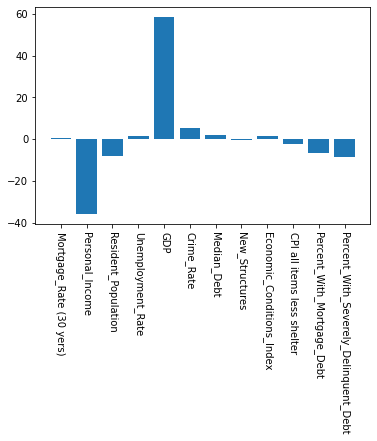

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2017,197.371078,4.15,75012,4841.772,3.8,437795.135,704.213158,36.63%,240081.3333,1.40%,702,1.70,247.190
1,2/1/2017,199.030444,4.17,75338,4843.252,3.8,440014.376,701.030317,36.77%,240431.6667,1.40%,695,1.65,247.615
2,3/1/2017,199.865139,4.20,75664,4844.733,3.5,442233.617,697.847475,36.90%,240782.0000,1.40%,1659,2.57,247.615
3,4/1/2017,199.046078,4.05,75990,4846.213,3.2,444452.858,694.664633,36.90%,240929.0000,1.37%,717,3.28,248.025
4,5/1/2017,199.401630,4.01,76316,4847.693,3.4,446672.099,691.481792,36.90%,241076.0000,1.33%,1662,3.30,248.025
5,6/1/2017,199.987678,3.90,76642,4849.174,3.7,448891.340,688.298950,36.90%,241223.0000,1.30%,1173,3.01,247.032
6,7/1/2017,201.825606,3.97,76968,4850.654,3.7,451110.581,685.116108,36.73%,241480.0000,1.27%,1875,2.95,247.032
7,8/1/2017,202.915818,3.88,77293,4852.134,3.5,453329.822,681.933267,36.57%,241737.0000,1.23%,1032,2.60,250.226
8,9/1/2017,204.398359,3.81,77619,4853.615,3.3,455549.063,678.750425,36.40%,241994.0000,1.20%,1245,2.50,250.226
9,10/1/2017,205.184641,3.90,77945,4855.095,3.0,457768.304,675.567583,36.27%,242478.3333,1.17%,1227,3.15,250.374


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,197.371078,4.15,75012,4841.772,3.8,437795.135,704.213158,240081.3333,702,1.70,247.190,36.63,1.40
1,2/1/2017,199.030444,4.17,75338,4843.252,3.8,440014.376,701.030317,240431.6667,695,1.65,247.615,36.77,1.40
2,3/1/2017,199.865139,4.20,75664,4844.733,3.5,442233.617,697.847475,240782.0000,1659,2.57,247.615,36.90,1.40
3,4/1/2017,199.046078,4.05,75990,4846.213,3.2,444452.858,694.664633,240929.0000,717,3.28,248.025,36.90,1.37
4,5/1/2017,199.401630,4.01,76316,4847.693,3.4,446672.099,691.481792,241076.0000,1662,3.30,248.025,36.90,1.33


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,75012,4841.772,3.8,437795.135,704.213158,240081.3333,702,1.70,247.190,36.63,1.40
1,4.17,75338,4843.252,3.8,440014.376,701.030317,240431.6667,695,1.65,247.615,36.77,1.40
2,4.20,75664,4844.733,3.5,442233.617,697.847475,240782.0000,1659,2.57,247.615,36.90,1.40
3,4.05,75990,4846.213,3.2,444452.858,694.664633,240929.0000,717,3.28,248.025,36.90,1.37
4,4.01,76316,4847.693,3.4,446672.099,691.481792,241076.0000,1662,3.30,248.025,36.90,1.33
5,3.90,76642,4849.174,3.7,448891.340,688.298950,241223.0000,1173,3.01,247.032,36.90,1.30
6,3.97,76968,4850.654,3.7,451110.581,685.116108,241480.0000,1875,2.95,247.032,36.73,1.27
7,3.88,77293,4852.134,3.5,453329.822,681.933267,241737.0000,1032,2.60,250.226,36.57,1.23
8,3.81,77619,4853.615,3.3,455549.063,678.750425,241994.0000,1245,2.50,250.226,36.40,1.20
9,3.90,77945,4855.095,3.0,457768.304,675.567583,242478.3333,1227,3.15,250.374,36.27,1.17


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500,0.125635,3.8100,3.900000,3.960000,4.075000,4.200000
Personal_Income,12.0,76804.583333,1174.968507,75012.0000,75908.500000,76805.000000,77700.500000,78597.000000
Resident_Population,12.0,4849.913833,5.337451,4841.7720,4845.843000,4849.914000,4853.985000,4858.056000
Unemployment_Rate,12.0,3.391667,0.334279,2.9000,3.150000,3.450000,3.700000,3.800000
GDP,12.0,450000.960500,8001.587218,437795.1350,443898.047750,450000.960500,456103.873250,462206.786000
Crime_Rate,12.0,686.707529,11.475899,669.2019,677.954715,686.707529,695.460344,704.213158
Median_Debt,12.0,241551.833333,1018.364323,240081.3333,240892.250000,241351.500000,242115.083325,243447.000000
New_Structures,12.0,1258.750000,478.056506,695.0000,921.000000,1200.000000,1659.750000,2129.000000
Economic_Conditions_Index,12.0,2.633333,0.548126,1.6500,2.457500,2.585000,3.045000,3.300000
CPI all items less shelter,12.0,248.888833,1.879412,247.0320,247.508750,248.025000,250.263000,252.932000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,2.131088,1.776308,-1.221343,2.005180,-1.214394,-0.077231,-0.402508,0.261882,1.355333,-1.922769,-0.909436
1,-0.630636,2.180972,1.789145,-1.221343,2.054802,-1.229174,0.005963,-0.419336,0.233447,1.385484,-1.841516,-0.909436
2,-0.602184,2.230856,1.801990,-1.444262,2.104424,-1.243953,0.089157,1.898161,0.756650,1.385484,-1.766067,-0.909436
3,-0.744447,2.280739,1.814828,-1.667181,2.154046,-1.258733,0.124065,-0.366447,1.160427,1.414570,-1.766067,-0.933941
4,-0.782384,2.330623,1.827665,-1.518568,2.203669,-1.273513,0.158973,1.905373,1.171801,1.414570,-1.766067,-0.966614
5,-0.886711,2.380507,1.840510,-1.295649,2.253291,-1.288293,0.193881,0.729796,1.006878,1.344124,-1.766067,-0.991118
6,-0.820322,2.430391,1.853347,-1.295649,2.302913,-1.303073,0.254911,2.417434,0.972756,1.344124,-1.864731,-1.015623
7,-0.905680,2.480122,1.866185,-1.444262,2.352535,-1.317853,0.315940,0.390826,0.773711,1.570714,-1.957592,-1.048296
8,-0.972070,2.530005,1.879030,-1.592874,2.402158,-1.332632,0.376970,0.902887,0.716841,1.570714,-2.056256,-1.072801
9,-0.886711,2.579889,1.891867,-1.815793,2.451780,-1.347412,0.491985,0.859614,1.086496,1.581214,-2.131705,-1.097306


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[203.50789393 203.97163553 204.07081882 206.15477955 206.81940956
 208.69796172 209.94788724 211.54842986 212.90639546 214.91236928
 216.44726878 216.82242144]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,203.507894
1,203.971636
2,204.070819
3,206.154780
4,206.819410
5,208.697962
6,209.947887
7,211.548430
8,212.906395
9,214.912369
